In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./profiling_results.csv', sep=';')

In [3]:
df.head()

,alg,func,bit,time
0,sha256,Hash value computing,256,0.000031
1,sha256,Hash value computing,256,0.000019
2,sha256,Hash value computing,256,0.000033
3,sha256,Hash value computing,256,0.000023
4,ecdsa,Key pair generation,256,0.076861


In [4]:
df.shape

(1689, 4)

In [5]:
#total data before dropping
df.describe()

,bit,time
count,1689.000000,1689.000000
mean,301.622262,3.394908
std,97.997930,24.967192
min,256.000000,0.000016
25%,256.000000,0.000105
50%,256.000000,0.078314
75%,256.000000,0.578920
max,512.000000,435.975189


In [6]:
df.alg.unique()

array(['sha256', 'ecdsa', 'gost', 'sha512', 'keccak256', 'scrypt', 'x17',
       'ethash', 'x11', 'myr-groestl_hash', 'lyra2re2_hash', 'blake2s',
       'blake2b'], dtype=object)

In [7]:
#let's create a new database with datas of time depends on algorithms
columns = df.alg.unique()
d = {}
for i in range(len(df)):
    if df.alg[i] in d:
        d[df.alg[i]].append(df.time[i])
    else:
        d[df.alg[i]]=[]

In [8]:
for elem in d:
    print(len(d[elem]))

565
289
106
99
92
60
98
55
58
83
58
55
58


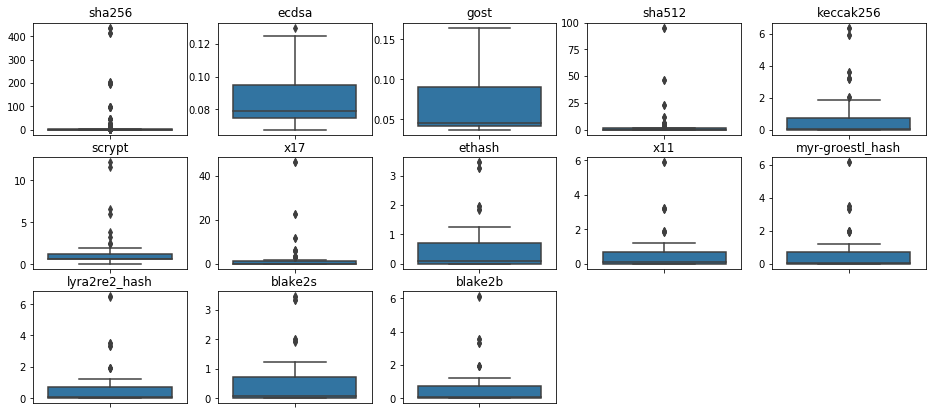

In [9]:
#AVE EPAM
i=1
plt.figure(figsize=(16,7))
for elem in df.alg.unique():
    plt.subplot(3,5,i)
    sns.boxplot(y=d[elem])
    plt.title(elem)
    i+=1
plt.show()

Самые глобальные выбросы у алгоритмов sha256, sha512. О чем это говорит - не знаю, какие-то так себе особенности работы алгоритмов на каких-то отличающихся данных. Если удалим выбросы из общего распределения, будет несправедливо по отношению к другим алгоритмам, или норм, я не знаю, как правильно данные препроцессить, остальные ребята так и останутся с выбросами. Лучше удалить их у всех. Как это сделать - не в курсе. Но как бы и ладно, разберемся, времени еще полно, не так ли.

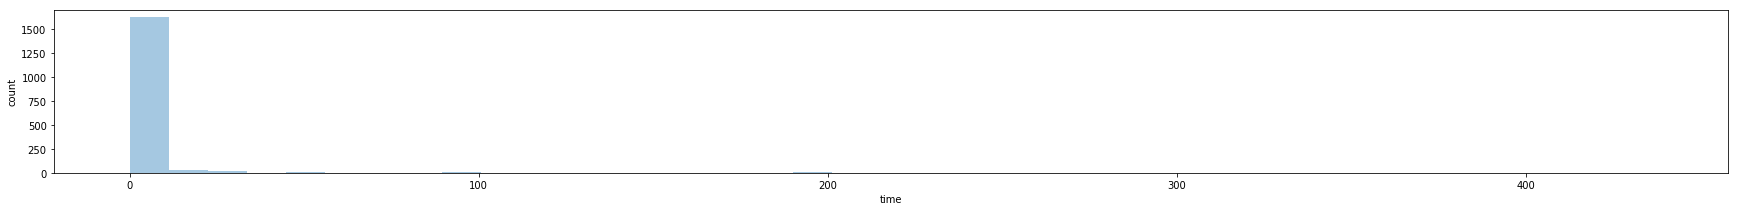

In [10]:
#only for visualization that all values are concentrated in beginning
#AVE EPAM
plt.figure(figsize=(30, 3))
sns.distplot(df.time, bins=39, kde=False)
plt.ylabel('count')
plt.show()

Короче, что я сделаю, если это важно вообще. Как бы качественная работа тут никому не сдалась, верно, поэтому я просто дропну все данные, у которых время выше 5. Почему? Потому что эта циферка ни к кому в доверительный интервал не попадает. На корявый препроц пойдет. Я б так же сделала, если бы не требовалась тотальная очистка и доскональный EDA.

In [11]:
df = df.drop(df[df.time > 5].index)
len(df)

1575

Со средними получается не распределение, а тупо точка на графике, потому что среднее мы считали для каждого алгоритма+функции, так что я сделала такие графики. Посмотри, что вышло и как это отличается от того, что ты хотел.

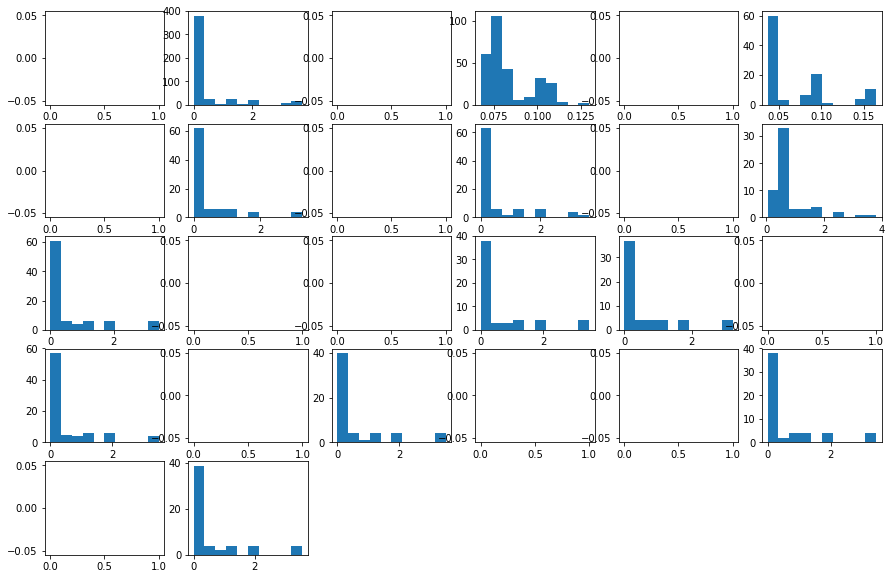

In [12]:
plt.figure(figsize=(15,10))
plt.tight_layout()
i=1
for elem in columns:

    x = df[(df.alg==elem) & (df.bit== 512)].func
    y = df[(df.alg==elem) & (df.bit== 512)].time
    plt.subplot(5,6,i)
    plt.hist(y)
    i+=1
    x = df[(df.alg==elem) & (df.bit== 256)].func
    y = df[(df.alg==elem) & (df.bit== 256)].time
    plt.subplot(5,6,i)
    plt.hist(y)
    i+=1
plt.show()
#у тебя нет разных битов

In [13]:
#here we are to drop all ecsda and gost rows first
df_1 = df.drop(df[df.alg=='ecdsa'].index, axis=0)
df_1 = df_1.drop(df[df.alg=='gost'].index, axis=0)
df_1.head()

,alg,func,bit,time
0,sha256,Hash value computing,256,0.000031
1,sha256,Hash value computing,256,0.000019
2,sha256,Hash value computing,256,0.000033
3,sha256,Hash value computing,256,0.000023
101,sha256,Hash value computing,256,0.000073


In [14]:
df_2 = pd.concat([df[(df.alg=='ecdsa')],df[(df.alg=='gost')]],  axis=0)
df_2.head()

,alg,func,bit,time
4,ecdsa,Key pair generation,256,0.076861
5,ecdsa,Key pair generation,256,0.074096
6,ecdsa,Signing message,256,0.102613
7,ecdsa,Verifying signature,256,0.083898
8,ecdsa,Key pair generation,256,0.080067


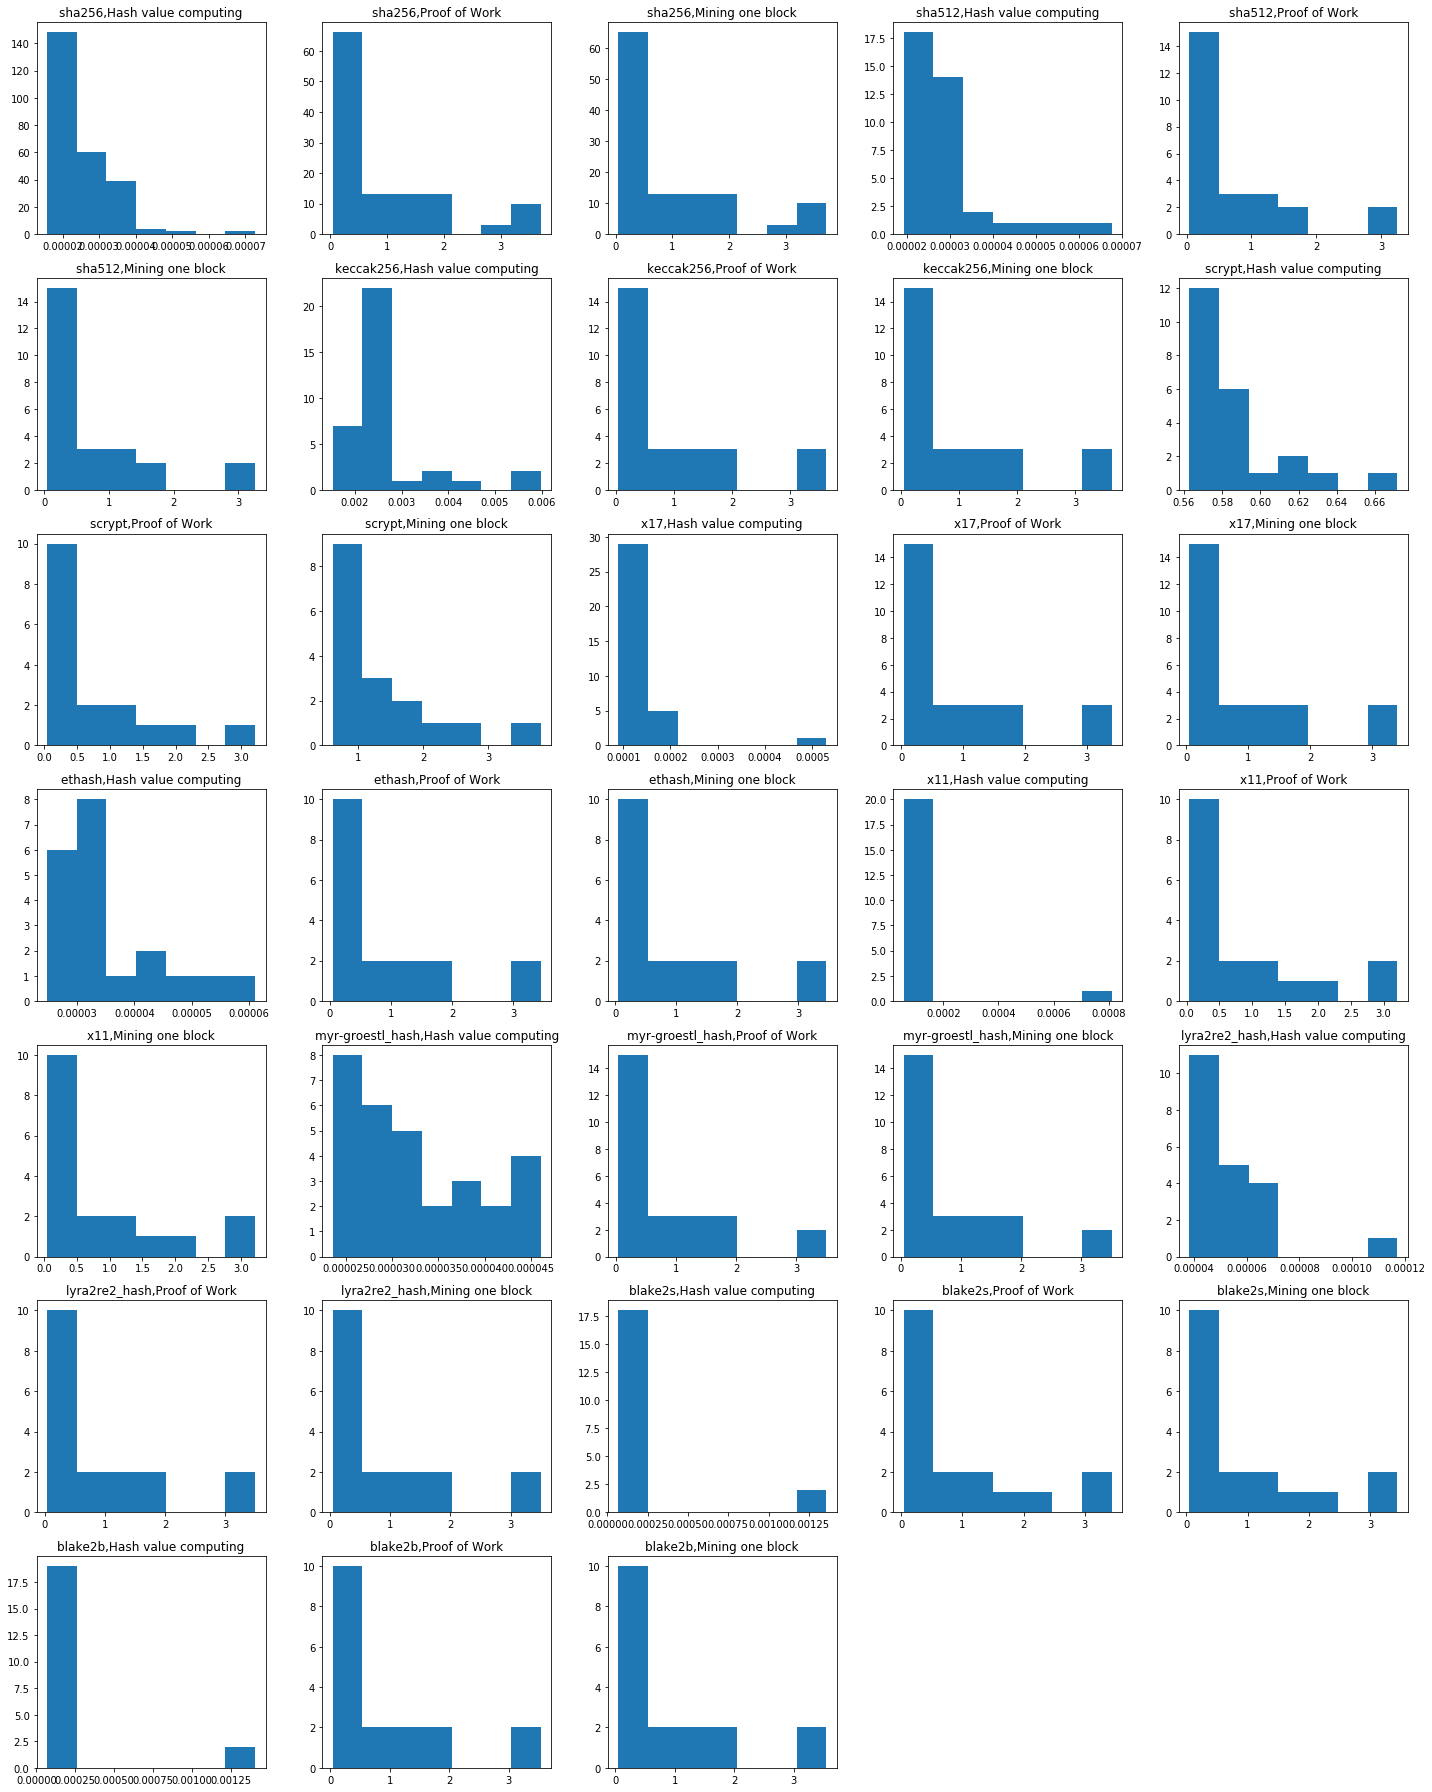

In [25]:
#then we try to make distribution on three different graphs
#idk how to fix this and if this is what u want
plt.figure(figsize=(20,25))
i=1
columns = df_1.alg.unique()
functions = df_1.func.unique()
for elem in columns:
    for elem2 in functions:
    
        y = df_1[(df_1.alg==elem) & (df_1.func==elem2)].time
        plt.subplot(7,5,i)
        i+=1
        plt.hist(y, bins=7)
        plt.title(elem+','+elem2)
plt.tight_layout() #не работает
plt.show()

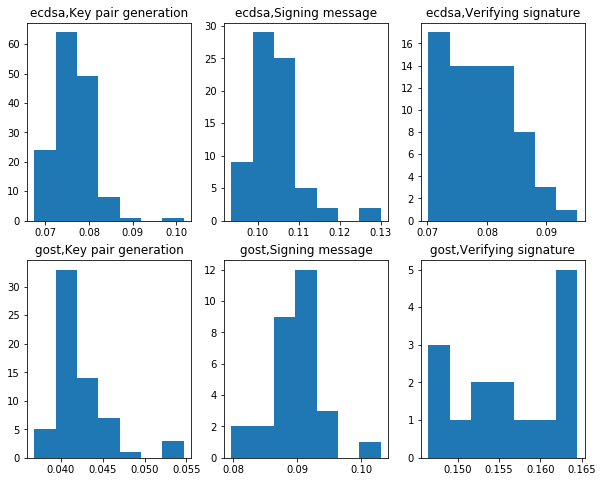

In [24]:
plt.figure(figsize=(10,8))
plt.tight_layout() #не работает
i=1
columns = df_2.alg.unique()
functions = df_2.func.unique()
for elem in columns:
    for elem2 in functions:
    
        y = df_2[(df_2.alg==elem) & (df_2.func==elem2)].time
        plt.subplot(2,3,i)
        i+=1
        plt.hist(y, bins=7)
        plt.title(elem+','+elem2)
plt.show()

In [ ]:
df[(df.alg=='sha256') & (df.func==)]

In [88]:
#AVE StackOverflow
df = df.groupby(['alg', 'func','bit'], as_index=False).mean()

In [89]:
#some data for preprocessing after dropping
df.describe()

,bit,time
count,39.000000,39.000000
mean,334.769231,0.517133
std,119.698406,0.420208
min,256.000000,0.000025
25%,256.000000,0.022450
50%,256.000000,0.710103
75%,512.000000,0.877157
max,512.000000,1.297297


Просто можно посмотреть, насколько от выбросов сместилась оценка и на основе этого решить, что, как бы, выбросы не очень ок, я не знаю, может их и надо анализировать, мол, почему некоторые алгоритмы так долго работают местами, но это ты уж сам порешай.

In [116]:
df.shape

(39, 4)

In [91]:
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df.head()

,alg,func,bit,time
0,blake2b,Hash value computing,256,0.000228
1,blake2b,Mining one block,256,0.890395
2,blake2b,Proof of Work,256,0.883545
3,blake2s,Hash value computing,256,0.000208
4,blake2s,Mining one block,256,0.893070


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118656780>,
      dtype=object)

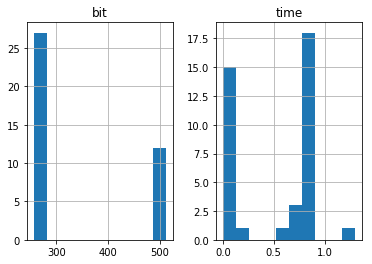

In [92]:
#lilbitmorebeautiful
df.hist()

#### В общем хочется норм графики

* Для алгоритмов хэширования (это всё что не ecdsa и не gost) посмотреть их время работы в распределении по столбцу func, т.е. для чего они использовались. Что делать со столбцом bit: например [alg=keccak, bit=256] и [alg=keccak, bit=512] считать разными алгоритмами
* Для алгоримтов ЦП (это всё что ecdsa или gost) посмотреть то же самое. 
* Графики можно делать горизонтальными, чтобы длинные подписи умещались примеры кода для горизонтальных графиков: 

https://github.com/Sinopsys/Data-Mining-Personal-Project-Hearthstone-Cards/blob/master/Hearthstone%20cards.ipynb

https://github.com/Sinopsys/IDAHSE-2017/blob/master/Assignment_1/Assignment_1/Assignment_1_Kupriyanov_IAD_1.ipynb
* Пример как в plt.subplot разложить много графиков в пару строк циклом:

https://github.com/Sinopsys/IDAHSE-2017/blob/master/Assignment_4/A4_Kupriyanov.ipynb

In [101]:
df.bit.nunique()

2

In [114]:
df

,alg,func,bit,time
0,blake2b,Hash value computing,256,0.000228
1,blake2b,Mining one block,256,0.890395
2,blake2b,Proof of Work,256,0.883545
3,blake2s,Hash value computing,256,0.000208
4,blake2s,Mining one block,256,0.893070
5,blake2s,Proof of Work,256,0.886808
6,ecdsa,Key pair generation,256,0.076300
7,ecdsa,Signing message,256,0.104522
8,ecdsa,Verifying signature,256,0.078622
9,ethash,Hash value computing,256,0.000036
